In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
df = pd.read_csv("1.csv")

# We will add a column to make this a signed network,
# Let us assign 1 if Rating > 4
#               0 otherwise
df['weight'] = [0 if df.iloc[i]['Rating'] < 4 else 1 for i in range(len(df))]
print(df)

       Source  Target  Rating        Time  weight
0           6       2       4  1289241912       1
1           6       5       2  1289241942       0
2           1      15       1  1289243140       0
3           4       3       7  1289245277       1
4          13      16       8  1289254254       1
5          13      10       8  1289254301       1
6           7       5       1  1289362700       0
7           2      21       5  1289370557       1
8           2      20       5  1289370622       1
9          21       2       5  1289380982       1
10         21       1       8  1289441411       1
11         21      10       8  1289441438       1
12         21       8       9  1289441451       1
13         21       3       7  1289441526       1
14         17       3       5  1289442313       1
15         17      23       1  1289489668       0
16         10       1       8  1289555656       1
17         10       6       7  1289555731       1
18         10      21       8  1289555746       1


In [3]:
# Split according to time and using 80% of it as training graph

df_train = df[df['Time'] < df['Time'].quantile(0.8)]
print(len(df_train)/len(df))
print(df_train)

0.8
       Source  Target  Rating        Time  weight
0           6       2       4  1289241912       1
1           6       5       2  1289241942       0
2           1      15       1  1289243140       0
3           4       3       7  1289245277       1
4          13      16       8  1289254254       1
5          13      10       8  1289254301       1
6           7       5       1  1289362700       0
7           2      21       5  1289370557       1
8           2      20       5  1289370622       1
9          21       2       5  1289380982       1
10         21       1       8  1289441411       1
11         21      10       8  1289441438       1
12         21       8       9  1289441451       1
13         21       3       7  1289441526       1
14         17       3       5  1289442313       1
15         17      23       1  1289489668       0
16         10       1       8  1289555656       1
17         10       6       7  1289555731       1
18         10      21       8  1289555746     

In [4]:
nodes_train = list(set(df_train['Source']).union(set(df_train['Target'])))

edges_train = [[df_train.iloc[i]['Source'],df_train.iloc[i]['Target'],df_train.iloc[i]['weight']] for i in range(len(df_train))]

In [5]:
fp1 = open("bitcoin_train.gml",'w')
fp1.write("graph\n[\n  multigraph 1\n")
for i in nodes_train:
    fp1.write("  node\n  [\n    id "+str(i)+"\n  ]\n")
    
for i in edges_train:
    fp1.write("  edge\n  [\n    source "+str(i[0]))
    fp1.write("\n    target "+str(i[1]))
    fp1.write("\n    weight "+str(i[2])+"\n  ]\n")
fp1.write("\n]") 
fp1.close()

In [6]:
# Forming the whole graph from the dataset
nodes_full = list(set(df['Source']).union(set(df['Target'])))

edges_full = [[df.iloc[i]['Source'],df.iloc[i]['Target'],df.iloc[i]['weight']] for i in range(len(df))]


fp1 = open("bitcoin_full.gml",'w')
fp1.write("graph\n[\n  multigraph 1\n")
for i in nodes_full:
    fp1.write("  node\n  [\n    id "+str(i)+"\n  ]\n")
    
for i in edges_full:
    fp1.write("  edge\n  [\n    source "+str(i[0]))
    fp1.write("\n    target "+str(i[1]))
    fp1.write("\n    weight "+str(i[2])+"\n  ]\n")
fp1.write("\n]") 
fp1.close()

In [7]:
# Let's get only the training graph and try to generate the whole graph
G = nx.read_gml("bitcoin_train.gml",label='id')

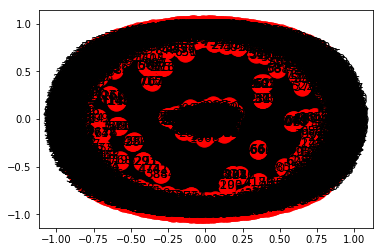

In [84]:
nx.draw_networkx(G)
plt.show()

## The algorithm we developed is as follows

for i = 1 to n do
    Pick a node j uniformly at random from f1; : : : ; i 􀀀 1g
    Create edge (i; j)
    Label the edge + with prob. p, and – with prob. (1 􀀀 p)
    for all neighbors k of j do
        if (i; j) is + then
            Create edge (i; k) with prob. rp.
            if (j; k) is + then
                Label edge (i; k) +.
            else
                Label edge (i; k) + or – with prob. 1/2.
            end if
        else
            if (j; k) is – then
                Create edge (i; k) with prob. rn.
                Label edge (i; k) –.
            end if
        end if
    end for
end for


In [8]:
nodes = nx.nodes(G)
edges = nx.edges(G)
# To select with probability 'p'
# 'p' is the prob of +ve edges
# -------------get from graph directly later ---- hardcoded for now
p = 0.89
edge_weights_for_new = list(np.random.choice([0, 1], size=len(nodes), p=[0.11,0.89]))

#rp is fraction of neighbours of j, that i discovers given that (i,j) is + . 
#rn is the fraction of neighbours of j, that i discovers given that (i,j) is - .
rp = 0.75
rn = 0.23
#len(edge_weights_for_new)
print(len(nx.nodes(G)))
print(len(nx.edges(G)))
print(len(edge_weights_for_new))

5104
29964
5104


In [9]:
import random
for i in range(3,len(nodes)):
    #Pick a node j uniformly at random from {1....i-1}
    j = random.randrange(1,i-1)
    #Create edge (i; j)
    G.add_edge(i,j)
    #Label the edge + with prob. p, and – with prob. (1-p)
    index_for_new_weight = random.randint(0,len(edge_weights_for_new)-1)
    print(index_for_new_weight)
    if(edge_weights_for_new[index_for_new_weight] == 1):
        G[i][j][0]['weight'] = 1
    else:
        G[i][j][0]['weight'] = 0
        
    neighb_j = G.neighbors(j)
    edges_rp = list(np.random.choice([0, 1], size=len(list(neighb_j)), p=[1-rp,rp]))
    edges_rn = list(np.random.choice([0, 1], size=len(list(neighb_j)), p=[1-rn,rn]))
    list_prob_equal = [0,1]
    
    #for all neighbors k of j do
    for k in neighb_j:
        # If (i,j) is +ve
        if(edge_weights_for_new[index_for_new_weight] == 1):
            # Create edge (i; k) with prob. rp.
            create_ik_or_not = random.randint(0,len(list(neighb_j)))
            if(edges_rp[create_ik_or_not] == 1):
                G.add_edge(i,k)
            # If (j,k) is +ve
            if(G[j][k] == 1):
                # label edge (i,k) as +ve
                G[i][k][0]['weight'] = 1
            else:
                # Label edge (i; k) + or – with prob. 1/2.
                index_ik = random.randint(0,len(list_prob_equal))
                if(list_prob_equal[index_ik] == 1):
                    G[i][k][0]['weight'] = 1
                else:
                    G[i][k][0]['weight'] = 0
                
                
        # If (i,j) is -ve
        else:
            # Create edge (i; k) with prob. rn.
            create_ik_or_not = random.randint(0,len(list(neighb_j)))
            if(edges_rp[create_ik_or_not] == 1):
                G.add_edge(i,k)
            # label (i,k) -ve
            G[i][k][0]['weight'] = 0
            

4694
4101
1206
3704
3312
1912
2401
3413
1368
1222
439
1859
216
3816
3651
3297
1613
117
1145
2528
3839
8
818
3056
1411
804
2738
4785
502
256
3891
1016
3526
2490
327
4770
4480
4782
4816
1346
4629
4100
519
1335
965
1094
3838
1878
4736
3989
3771
2481
3507
3901
3107
3765
287
3097
3470
476
1157
4292
1477
683
3449
2848
4414
1059
4646
3774
635
3966
4821
3348
2412
4732
1585
3826
2483
609
2699
4475
1257
712
2049
4666
991
4916
701
296
4554
4192
4094
452
919
4518
3473
923
2222
1704
2838
1521
4966
4271
1863
276
3418
4024
2467
4321
1632
764
4737
1953
3145
3542
3330
1134
2981
1721
637
2375
2707
1086
2159
3343
1237
3802
4112
3595
344
2037
995
3858
3118
4650
886
194
5042
3454
2411
1382
3409
4082
635
372
718
4520
749
4332
4624
1463
5085
3450
4674
2808
2037
3030
1313
1127
2189
3682
73
163
768
1142
3033
2442
4651
4471
3759
3187
3153
5102
753
1101
843
3410
4545
2269
3526
2093
2170
4850
3600
17
4664
1123
2638
3013
796
2908
1344
872
3921
3934
2106
4486
1580
4715
422
5035
477
4396
738
3290
1998
3078
4904
1552

3365
902
513
2265
3215
2075
2329
4706
1744
2072
4967
2720
2852
4137
4755
4055
4053
3947
2447
1572
113
3332
2114
2928
3748
4745
4119
3145
3717
3396
2199
1841
2035
3640
2271
1052
4782
3308
3676
1867
3732
1348
992
636
493
5057
4460
2763
263
1697
3043
3445
1699
840
557
1705
2823
150
18
554
21
1613
3835
33
3366
3353
947
531
2811
1221
4936
316
2494
4440
634
3873
3486
5047
260
1337
2422
669
279
3270
2549
2270
2922
182
4526
4786
1955
993
51
2590
1395
2286
1031
2789
5086
292
3202
279
674
790
2931
4676
1900
2932
4153
1801
4934
2223
1960
500
926
2023
257
4806
1685
4589
982
2118
5102
3579
3457
3159
3298
4470
799
2820
3196
2568
247
2146
4746
1323
2285
2894
1835
3070
3713
3237
4755
1880
4973
1808
1316
4428
3526
961
207
4359
1122
4153
4884
888
3808
2037
696
4688
48
4967
4977
4129
175
4967
3674
4072
332
4841
3023
3540
3528
3817
425
3094
1426
2911
144
820
3127
1992
2419
3294
3470
3704
4459
134
3874
1309
2772
2342
4397
1126
1779
4926
1121
2226
225
2525
4001
789
4601
2814
3000
81
4624
2317
4130
3014
1507

4369
3129
3048
2629
1747
553
441
4903
648
3721
1657
1087
1937
3472
969
4775
1809
3313
2640
1755
2381
1330
4313
4943
4177
2986
639
4947
3987
974
3816
734
866
655
4653
133
2977
1446
2300
3226
822
3549
2396
4872
2676
1187
4657
1781
3528
676
1839
906
4437
993
4919
3483
359
5008
108
1743
4767
504
2578
2559
3870
3248
2252
3145
888
1414
2316
1474
2561
2552
2881
2685
3545
2737
4858
4956
2278
624
4576
1084
1679
4926
2838
1893
5047
2739
5020
4084
359
21
1498
4662
952
3246
3006
4366
4589
3343
1887
1383
2919
2196
1202
3188
3812
4704
1577
4211
3868
3876
4801
4370
4648
3430
3358
4612
1010
4150
3418
330
3741
4979
516
1341
3589
3112
3482
2983
291
2927
4601
2019
5007
2399
296
1418
1610
811
2917
2042
3151
632
4010
1433
4526
1442
4042
3166
2066
2683
983
4254
4758
902
1773
1659
2211
3523
1548
4602
328
4131
1833
65
1726
2316
4096
3537
4887
1472
2935
652
110
5039
4684
1451
427
4819
358
452
3597
3834
3966
3291
1006
4729
3711
3404
4025
3261
1636
2880
3226
3377
892
263
3049
2157
2118
4742
2959
1048
2196
481
22

In [10]:
len(nx.edges(G))

35065

In [11]:
# To compare how the algo performed, we will compare the triadic statistics as follows
G1=nx.to_directed(G)
triads_t = nx.triadic_census(G1)

#no of triads
print("The sum of each type of triads:")
triads_t

The sum of each type of triads:


{'003': 23289292624,
 '012': 0,
 '102': 117074901,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 1245983,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 22691}

In [12]:
ratios_of_triads_t = []
sum_triads_t = sum(triads_t.values()) 

for i in triads_t.keys():
    ratios_of_triads_t.append((i,(triads_t[i]/sum_triads_t)))
    
print("The ratios of each type of traids:")
ratios_of_triads_t

The ratios of each type of traids:


[('003', 0.9949442321303227),
 ('012', 0.0),
 ('102', 0.005001568719057654),
 ('021D', 0.0),
 ('021U', 0.0),
 ('021C', 0.0),
 ('111D', 0.0),
 ('111U', 0.0),
 ('030T', 0.0),
 ('030C', 0.0),
 ('201', 5.322976610740514e-05),
 ('120D', 0.0),
 ('120U', 0.0),
 ('120C', 0.0),
 ('210', 0.0),
 ('300', 9.69384512263113e-07)]

In [13]:
# Lets get the same statistics for the original graph to see how the algo performed
# Let's get only the training graph and try to generate the whole graph
G_orig = nx.read_gml("bitcoin_full.gml",label='id')

G1=nx.to_directed(G_orig)
triads_f = nx.triadic_census(G1)

#no of triads
print("The sum of each type of triads:")
triads_f

The sum of each type of triads:


{'003': 33758216573,
 '012': 0,
 '102': 123065040,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 1595914,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 33493}

In [14]:
ratios_of_triads_f = []
sum_triads_f = sum(triads_f.values()) 

for i in triads_f.keys():
    ratios_of_triads_f.append((i,(triads_f[i]/sum_triads_f)))
    
print("The ratios of each type of traids:")
ratios_of_triads_f

The ratios of each type of traids:


[('003', 0.9963198425623349),
 ('012', 0.0),
 ('102', 0.003632068092595664),
 ('021D', 0.0),
 ('021U', 0.0),
 ('021C', 0.0),
 ('111D', 0.0),
 ('111U', 0.0),
 ('030T', 0.0),
 ('030C', 0.0),
 ('201', 4.7100852670479904e-05),
 ('120D', 0.0),
 ('120U', 0.0),
 ('120C', 0.0),
 ('210', 0.0),
 ('300', 9.884923990217414e-07)]

In [15]:
# To quantify the performance of the algo, let's define "Accuracy" wrt to the ratios of triads as :
y_actual = []
y_predicted = []

for i in range(len(ratios_of_triads_f)):
    y_actual.append(ratios_of_triads_f[i][1])
    y_predicted.append(ratios_of_triads_t[i][1])

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('RMSE = ',rms)

r2 = r2_score(y_actual, y_predicted)
print('r2 = ',r2)

RMSE =  0.00048527528208775075
r2 =  0.9999959492479001


In [50]:
#all plots for generated graph
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)

degc = nx.degree_centrality(G1)
bet = nx.betweenness_centrality(G1)
clos = nx.closeness_centrality(G1)
eig = nx.eigenvector_centrality(G1)

centrality_measures = {
'degree': degc,
'betweenness': bet,
'closeness': clos,
'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality
sns.pairplot(centrality)
plt.show()

NetworkXNotImplemented: not implemented for multigraph type

In [ ]:
#all plots for original graph
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)

degc = nx.degree_centrality(G_orig)
bet = nx.betweenness_centrality(G_orig)
clos = nx.closeness_centrality(G_orig)
eig = nx.eigenvector_centrality(G_orig)

centrality_measures = {
'degree': degc,
'betweenness': bet,
'closeness': clos,
'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality
sns.pairplot(centrality)
plt.show()

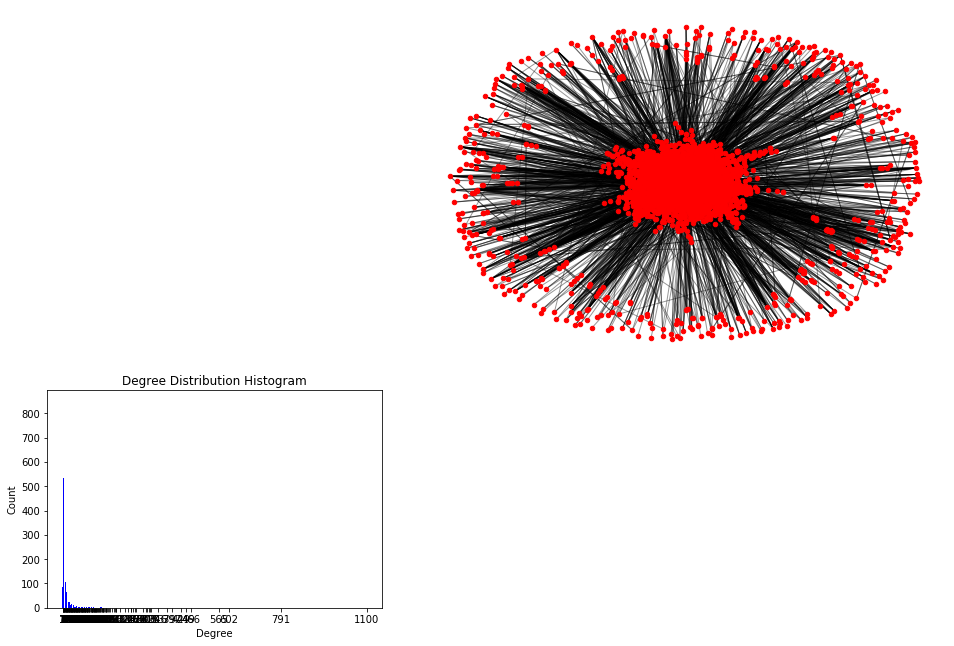

In [16]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([1, 1, 1.2, 1.2])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

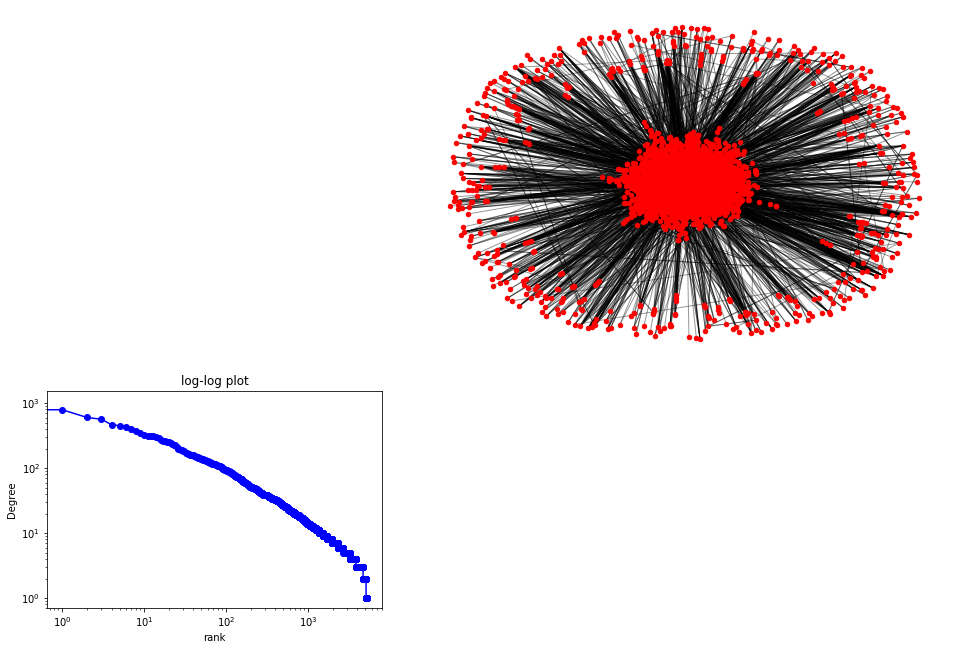

In [17]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
# degreeCount = collections.Counter(degree_sequence)
# deg, cnt = zip(*degreeCount.items())

# fig, ax = plt.subplots()
# plt.bar(deg, cnt, width=0.80, color='b')
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("log-log plot")
plt.ylabel("Degree")
plt.xlabel("rank")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([1, 1, 1.2, 1.2])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

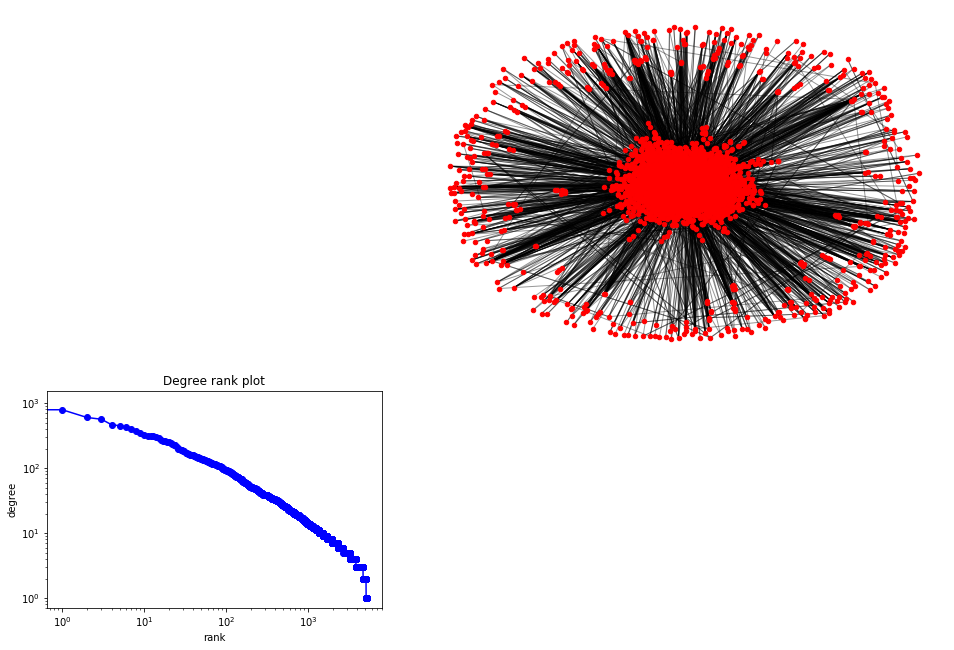

In [19]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([1,1,1.2,1.2])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

In [47]:
actual_f = []
actual_f_labels = []
predicted_f = []
predicted_f_labels = []
for i in ratios_of_triads_f:
    if i[1] != 0.0:
        actual_f.append(i[1])
        actual_f_labels.append(i[0])
for i in ratios_of_triads_t:
    if i[1] != 0.0:
        predicted_f.append(i[1])
        predicted_f_labels.append(i[0])
print(actual_f , actual_f_labels)
print(predicted_f , predicted_f_labels)

[0.9963198425623349, 0.003632068092595664, 4.7100852670479904e-05, 9.884923990217414e-07] ['003', '102', '201', '300']
[0.9949442321303227, 0.005001568719057654, 5.322976610740514e-05, 9.69384512263113e-07] ['003', '102', '201', '300']


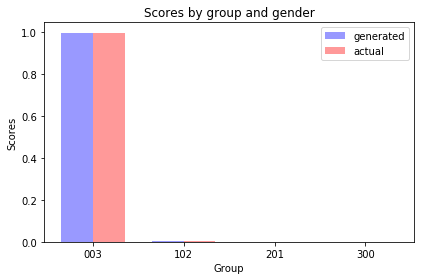

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 4

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, predicted_f, bar_width,
                alpha=opacity, color='b',
                label='generated')

rects2 = ax.bar(index + bar_width, actual_f, bar_width,
                alpha=opacity, color='r',
                label='actual')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by ratio of triads and type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(actual_f_labels)
ax.legend()

fig.tight_layout()
plt.show()

In [39]:
#log scores are plotted for each type of triads
import math
actual_scores_f = []
actual_scores_f_labels = []
predicted_scores_f = []
predicted_scores_f_labels = []
for k,v in triads_f.items():
    if triads_f[k] != 0:
        actual_scores_f.append(math.log(v))
        actual_scores_f_labels.append(k)
for k,v in triads_t.items():
    if triads_t[k] != 0:
        predicted_scores_f.append(math.log(v))
        predicted_scores_f_labels.append(k)
print(actual_scores_f , actual_scores_f_labels)
print(predicted_scores_f , predicted_scores_f_labels)

[24.242489678649644, 18.628223554069358, 14.28295717082828, 10.419091740755093] ['003', '102', '201', '300']
[23.871259547861012, 18.578324467421734, 14.035435334576748, 10.02972364908127] ['003', '102', '201', '300']


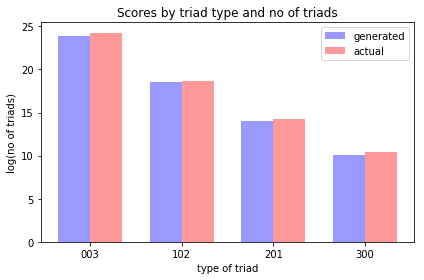

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 4

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, predicted_scores_f, bar_width,
                alpha=opacity, color='b',
                label='generated')

rects2 = ax.bar(index + bar_width, actual_scores_f, bar_width,
                alpha=opacity, color='r',
                label='actual')

ax.set_xlabel('type of triad')
ax.set_ylabel('log(no of triads)')
ax.set_title('Scores by triad type and no of triads')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(actual_scores_f_labels)
ax.legend()

fig.tight_layout()
plt.show()